# О компании
Goal Zone - сеть фитнес-клубов в Канаде.
GoalZone предлагает широкий выбор фитнес-классов на 25 и 15 человек.
Некоторые занятия всегда полностью забронированы. При полном бронировании посещаемость занятий часто низкая.
GoalZone хочет увеличить количество мест, доступных для занятий.
Они хотят сделать это, предсказывая, посетит ли участник занятие или нет.
Если они могут предсказать, что участник не придет на занятие, они могут освободить другое место
.

## Подключение модулей


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных

In [72]:
df = pd.read_csv('fitness_class_2212.csv')
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


## Описание полей набора данных

booking_id - Уникальный идентификатор бронирования.

months_as_member - Количество месяцев в качестве участника данного фитнес-клуба, минимум 1 месяц.

weight - Вес участника в кг, округленный до 2 знаков после запятой.

days_before -  количество дней до начала занятий, на которые зарегистрировался участник.

day_of_week - День недели, в который проводятся занятия.

time - Время проведения занятий. Либо утром, либо вечером

category - Категория занятия фитнесом.

attended - Независимо от того, посещал ли участник занятия (1) или нет (0).

## Разведочный анализ данных

In [73]:
df.shape


(1500, 8)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [75]:
df.days_before.unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [76]:
df['days_before'] = df['days_before'].str.replace(' days', '').astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   int32  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 88.0+ KB


In [78]:
df.day_of_week.unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [79]:
replacements = {
    'Wednesday': 'Wed',
    'Monday': 'Mon',
    'Fri.': 'Fri'
}

df['day_of_week'] = df['day_of_week'].replace(replacements).astype('object') 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   int32  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 88.0+ KB


In [81]:
df['weight']= df['weight'].fillna(df['weight'].mean())

In [82]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [83]:
df.duplicated().sum()

0

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.7500,750.500,1125.2500,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.0000,12.000,19.0000,148.00
weight,1500.0,82.610378,12.680411,55.41,73.5625,81.035,89.3825,170.52
days_before,1500.0,8.346667,4.077938,1.00,4.0000,9.000,12.0000,29.00
attended,1500.0,0.302667,0.459565,0.00,0.0000,0.000,1.0000,1.00


In [85]:
df['day_of_week'] = df['day_of_week'].str[:3]

day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)


In [86]:
category_mapping = {'Strength': 1, 'HIIT': 2, 'Cycling': 3, 'Yoga': 4, '-': 0, 'Aqua': 5}

df['category'] = df['category'].map(category_mapping)

In [87]:
df['category'].unique()

array([1, 2, 3, 4, 0, 5], dtype=int64)

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.7500,750.500,1125.2500,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.0000,12.000,19.0000,148.00
weight,1500.0,82.610378,12.680411,55.41,73.5625,81.035,89.3825,170.52
days_before,1500.0,8.346667,4.077938,1.00,4.0000,9.000,12.0000,29.00
day_of_week,1500.0,4.105333,1.994214,1.00,2.0000,4.000,6.0000,7.00
category,1500.0,2.410000,1.043692,0.00,2.0000,2.000,3.0000,5.00
attended,1500.0,0.302667,0.459565,0.00,0.0000,0.000,1.0000,1.00


In [89]:
time_mapping = {'AM': 0, 'PM': 1}

df['time'] = df['time'].map(time_mapping)

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.7500,750.500,1125.2500,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.0000,12.000,19.0000,148.00
weight,1500.0,82.610378,12.680411,55.41,73.5625,81.035,89.3825,170.52
days_before,1500.0,8.346667,4.077938,1.00,4.0000,9.000,12.0000,29.00
day_of_week,1500.0,4.105333,1.994214,1.00,2.0000,4.000,6.0000,7.00
time,1500.0,0.239333,0.426819,0.00,0.0000,0.000,0.0000,1.00
category,1500.0,2.410000,1.043692,0.00,2.0000,2.000,3.0000,5.00
attended,1500.0,0.302667,0.459565,0.00,0.0000,0.000,1.0000,1.00


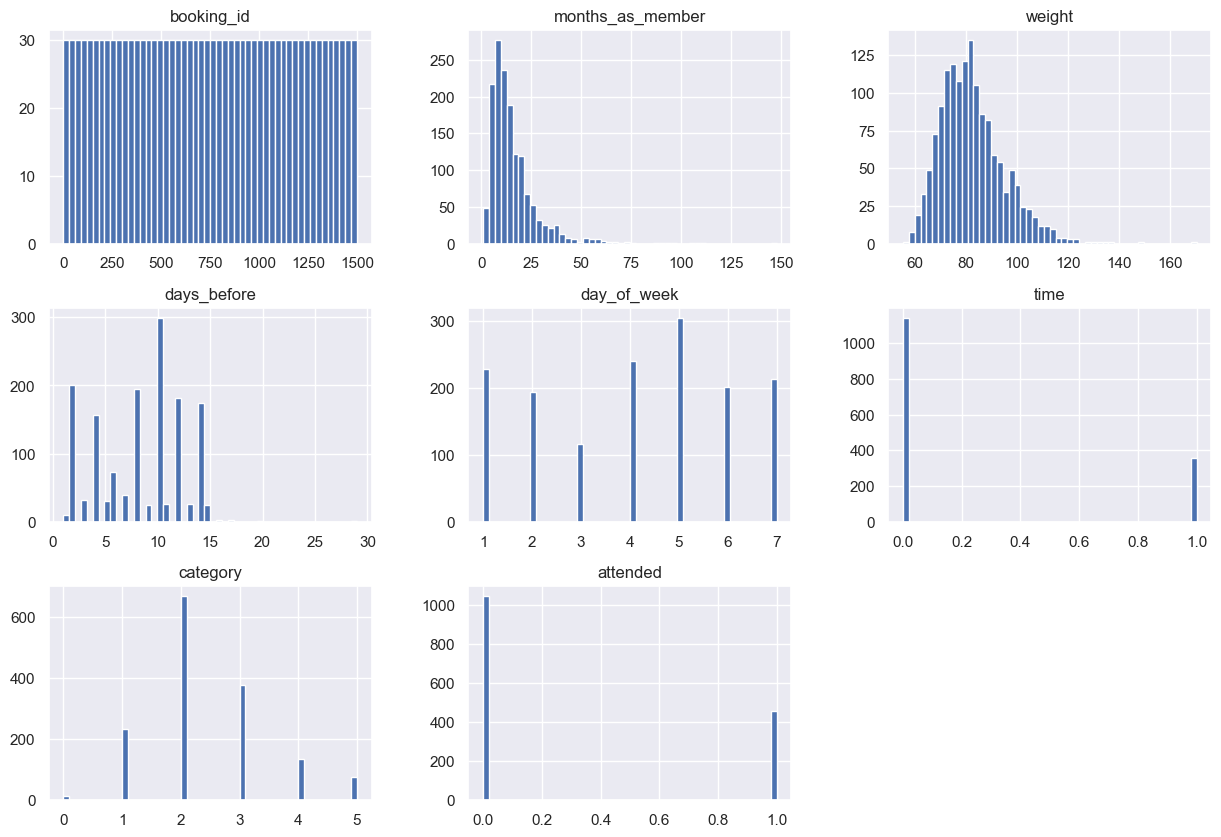

In [91]:
df.hist(figsize = (15,10), bins = 50);


In [92]:
features_names = ['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category', 
                  'attended']

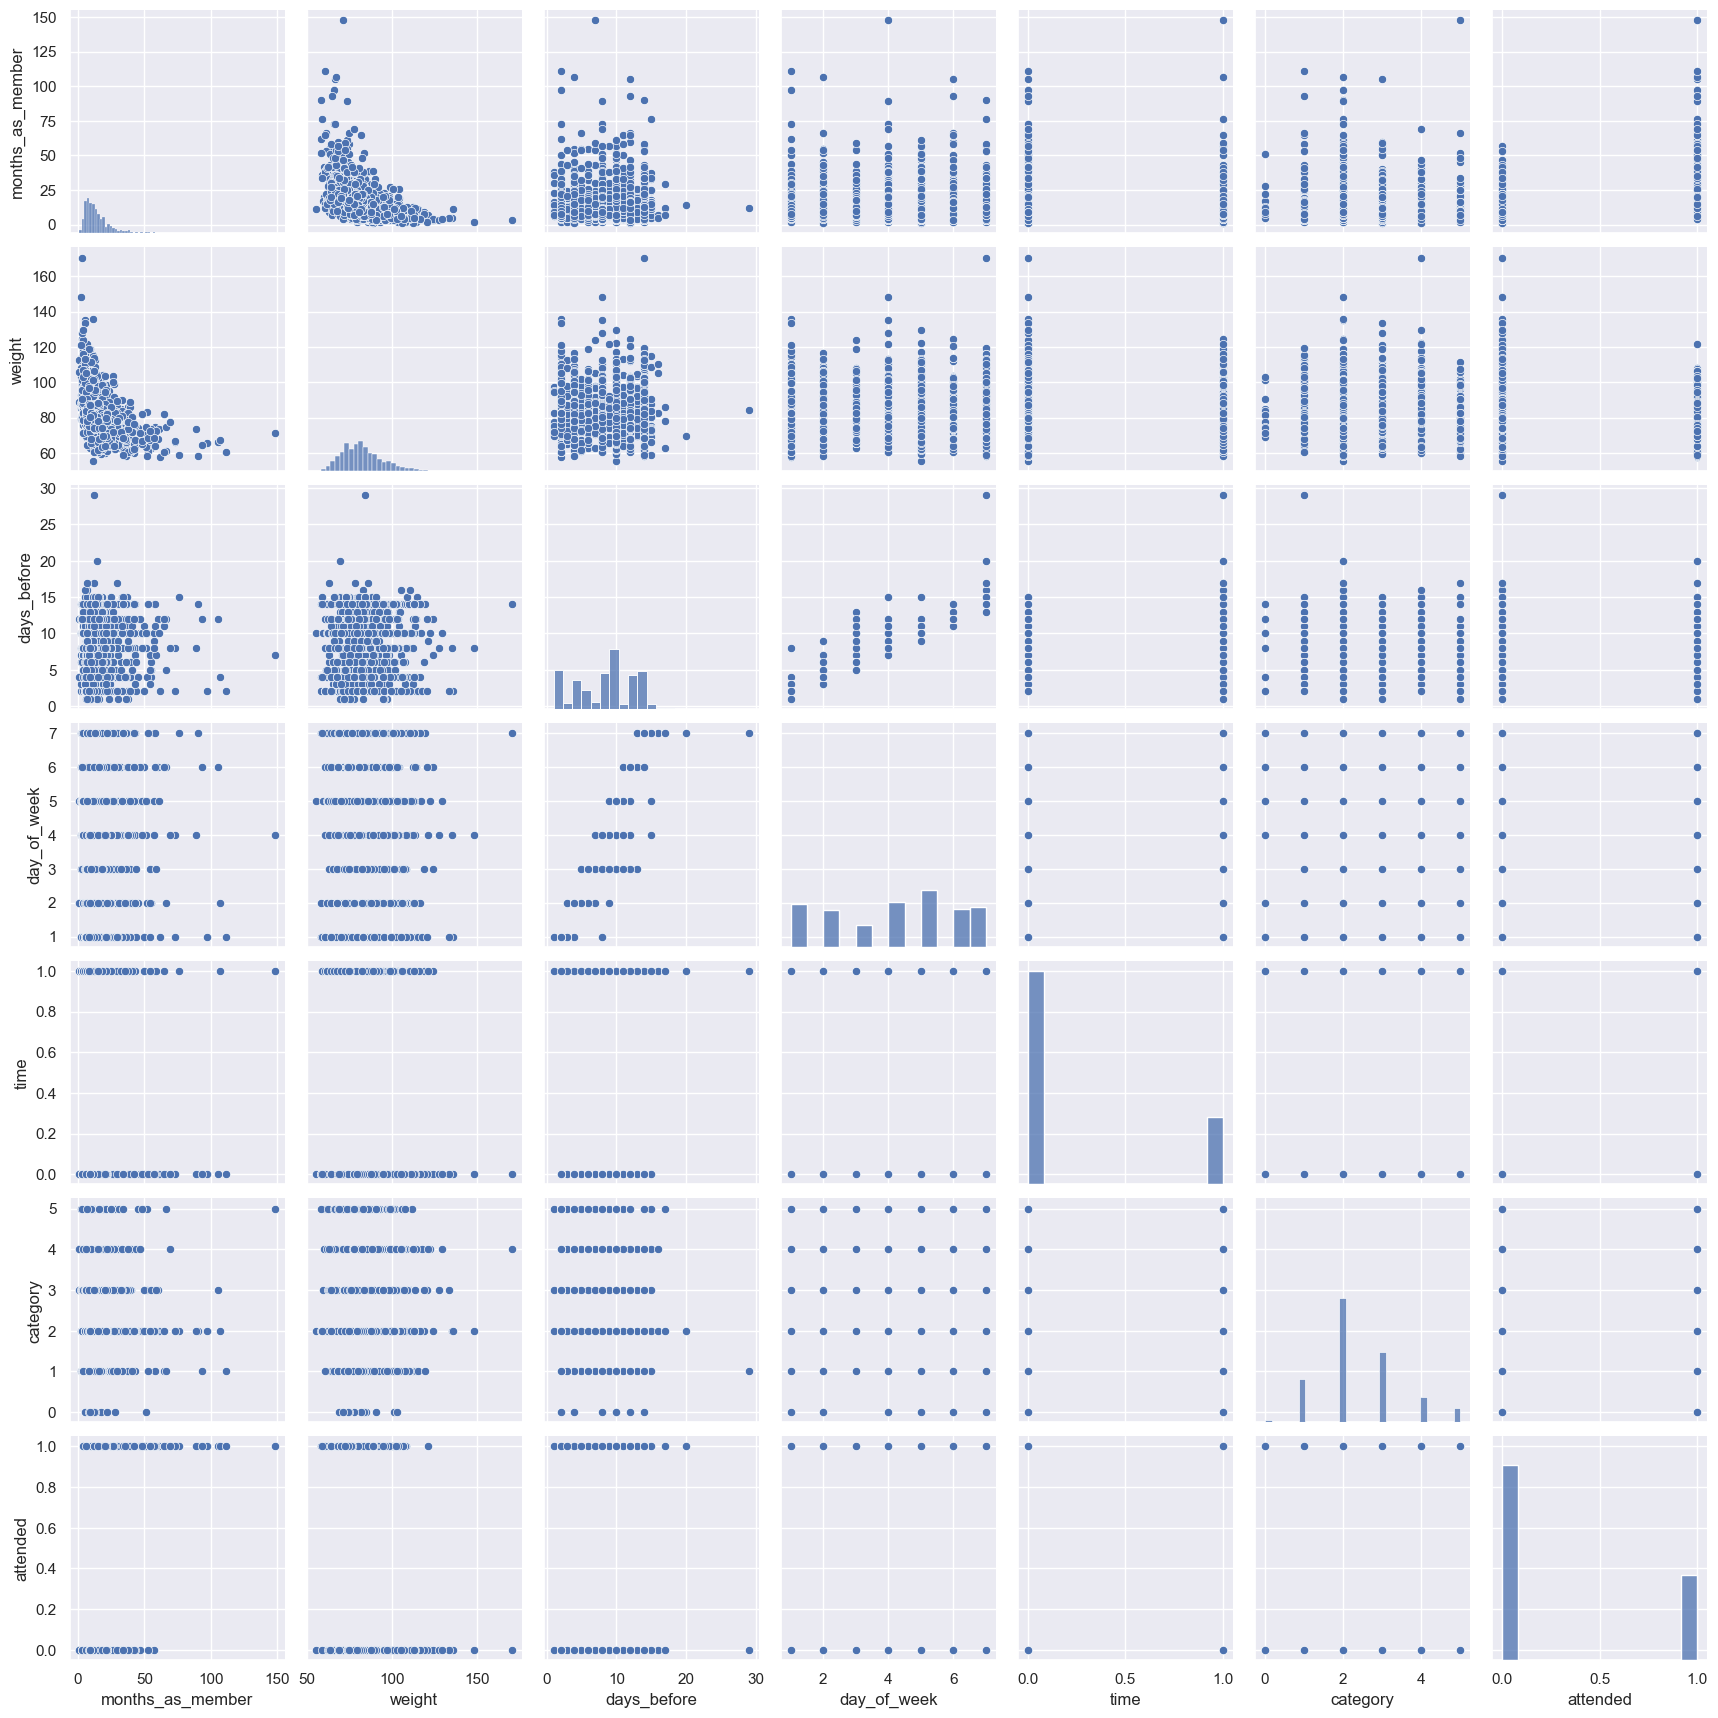

In [93]:
sns.pairplot(df[features_names])

In [94]:
corr = df[['months_as_member', 'weight','days_before','day_of_week', 'time', 'category', 
                  'attended']].corr()
corr

,months_as_member,weight,days_before,day_of_week,time,category,attended
months_as_member,1.000000,-0.465594,0.003001,0.008920,-0.011570,0.017325,0.485526
weight,-0.465594,1.000000,0.001703,-0.001703,0.006460,0.019841,-0.283521
days_before,0.003001,0.001703,1.000000,0.980143,-0.051150,0.002163,0.024068
day_of_week,0.008920,-0.001703,0.980143,1.000000,-0.094690,0.002955,0.035070
time,-0.011570,0.006460,-0.051150,-0.094690,1.000000,0.008701,-0.049850
category,0.017325,0.019841,0.002163,0.002955,0.008701,1.000000,0.023450
attended,0.485526,-0.283521,0.024068,0.035070,-0.049850,0.023450,1.000000


<Axes: >

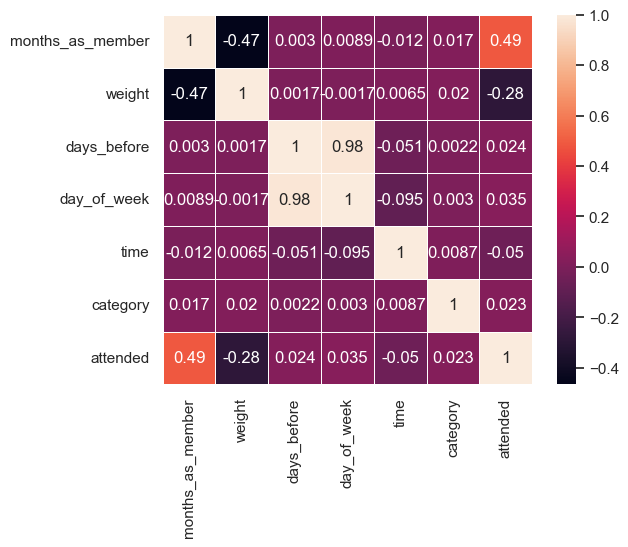

In [95]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Наблюдаем сильную зависимость между months_as_member и attended

### Формирование дата-сета для обучения моделей

In [96]:
X = pd.concat([df[features_names]], axis = 1)
X.shape

(1500, 7)

In [97]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['attended']
del X["attended"]

### Разделение набора данных

In [98]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1005, 6) (495, 6) (1005,) (495,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [100]:
%%time
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 8 ms


KNeighborsClassifier()

In [102]:
# возвращаем вектор предсказанных целевых значений для тестовой выборки
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [103]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.817910447761194
test accuracy:  0.7151515151515152


In [104]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

In [105]:
y_pred = knn.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       327
           1       0.62      0.42      0.50       168

    accuracy                           0.72       495
   macro avg       0.68      0.64      0.65       495
weighted avg       0.70      0.72      0.70       495



### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [111]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 4.54 ms


GaussianNB()

In [112]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [113]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

In [114]:
y_pred = gnb.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       327
           1       0.78      0.40      0.53       168

    accuracy                           0.76       495
   macro avg       0.77      0.67      0.68       495
weighted avg       0.76      0.76      0.73       495



### Random Forest Classifier (Классификатор дерева решений)

In [120]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 625 ms
Wall time: 374 ms


In [121]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [122]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

In [123]:
y_pred = gnb.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       327
           1       0.78      0.40      0.53       168

    accuracy                           0.76       495
   macro avg       0.77      0.67      0.68       495
weighted avg       0.76      0.76      0.73       495



### Logistic Regression (Логистическая регрессия)

In [129]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 11 ms


LogisticRegression(random_state=42)

In [131]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [139]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

### KNeighborsClassifier (K-Ближайшие Соседи)

In [106]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[283  44]
 [ 97  71]]
train accuracy:  0.817910447761194
test accuracy:  0.7151515151515152
test mean_squared_error:  0.28484848484848485
test mean_absolute_error:  0.28484848484848485
test precision_score:  0.6173913043478261
test recall_score:  0.4226190476190476
test f1_score:  0.5017667844522967


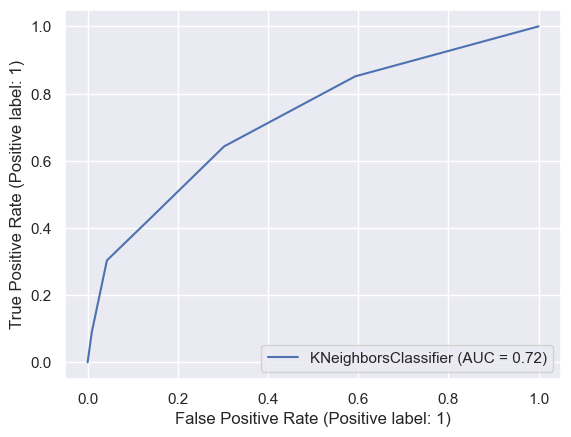

In [107]:

svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


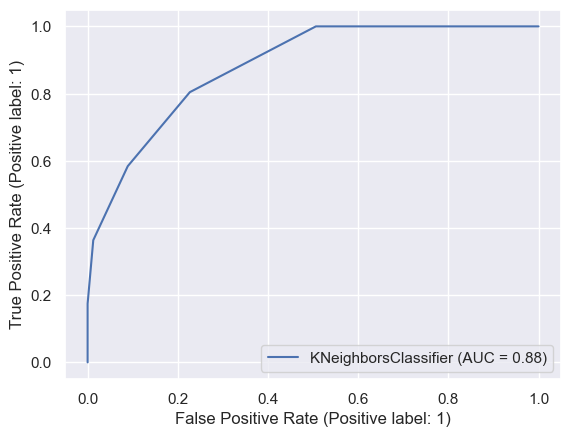

In [108]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [109]:

roc_auc_score(y_test, y_test_predict, average='macro')

0.6440312363477502

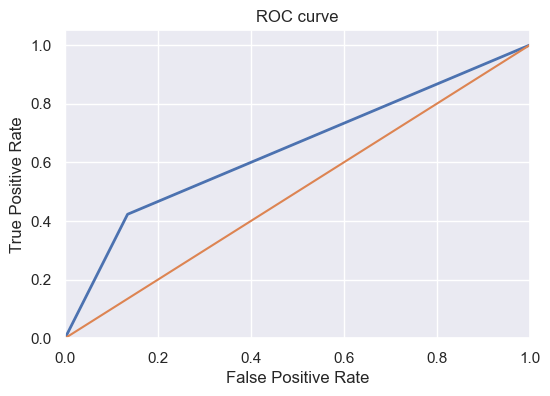

In [110]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Gaussian Naive Bayes (Наивный Байес)

In [115]:
# performance measurement
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[308  19]
 [101  67]]
train accuracy:  0.7960199004975125
test accuracy:  0.7575757575757576
test mean_squared_error:  0.24242424242424243
test mean_absolute_error:  0.24242424242424243
test precision_score:  0.7790697674418605
test recall_score:  0.39880952380952384
test f1_score:  0.5275590551181103


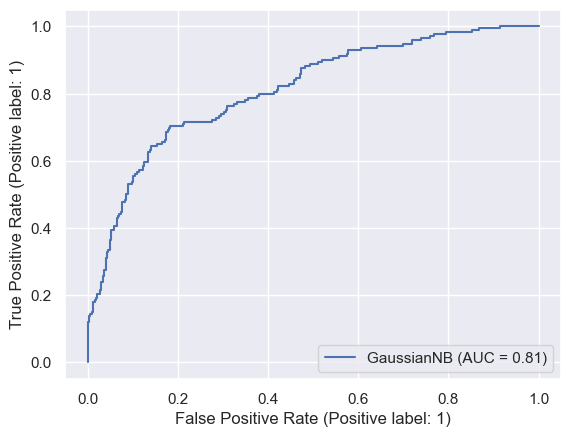

In [116]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

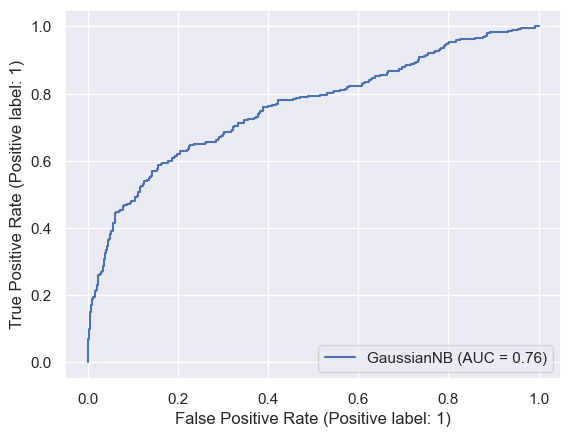

In [117]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

In [118]:
roc_auc_score(y_test, y_test_predict, average='macro')

0.6703527741371778

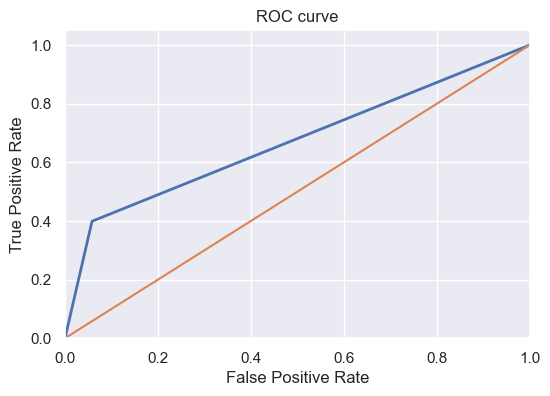

In [119]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Random Forest Classifier (Случайные леса)

In [124]:
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[297  30]
 [ 96  72]]
train accuracy:  0.9084577114427861
test accuracy:  0.7454545454545455
test mean_squared_error:  0.2545454545454545
test mean_absolute_error:  0.2545454545454545
test precision_score:  0.7058823529411765
test recall_score:  0.42857142857142855
test f1_score:  0.5333333333333333


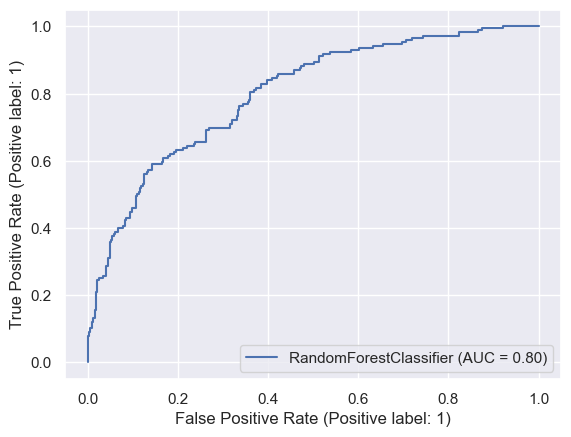

In [125]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

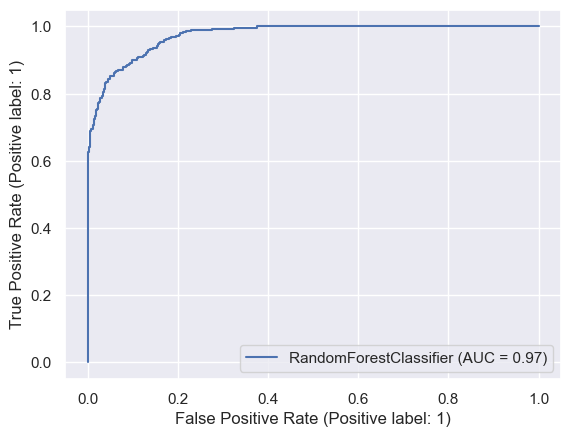

In [126]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

In [127]:
roc_auc_score(y_test, y_test_predict, average='macro')

0.6684141546526868

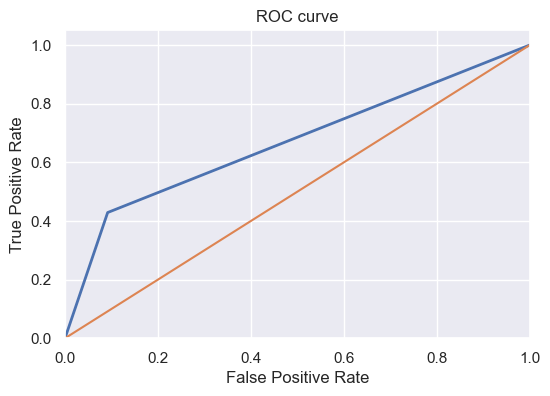

In [128]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Logistic Regression (Логистическая регрессия)

In [133]:
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))
print('test precision_score: ', precision_score(y_test, y_test_predict))
print('test recall_score: ', recall_score(y_test, y_test_predict))
print('test f1_score: ', f1_score(y_test, y_test_predict))

[[310  17]
 [108  60]]
train accuracy:  0.7860696517412935
test accuracy:  0.7474747474747475
test mean_squared_error:  0.25252525252525254
test mean_absolute_error:  0.25252525252525254
test precision_score:  0.7792207792207793
test recall_score:  0.35714285714285715
test f1_score:  0.4897959183673469


In [134]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       327
           1       0.78      0.36      0.49       168

    accuracy                           0.75       495
   macro avg       0.76      0.65      0.66       495
weighted avg       0.75      0.75      0.72       495



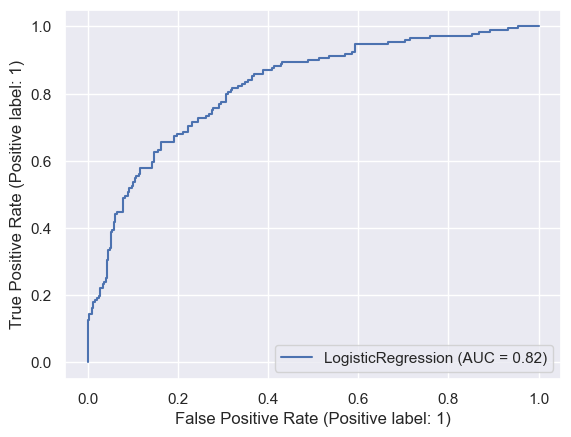

In [135]:

svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

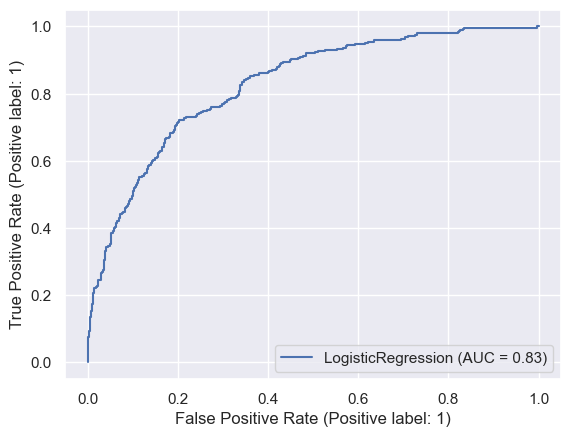

In [136]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

In [137]:

roc_auc_score(y_test, y_test_predict, average='macro')

0.6525775447793797

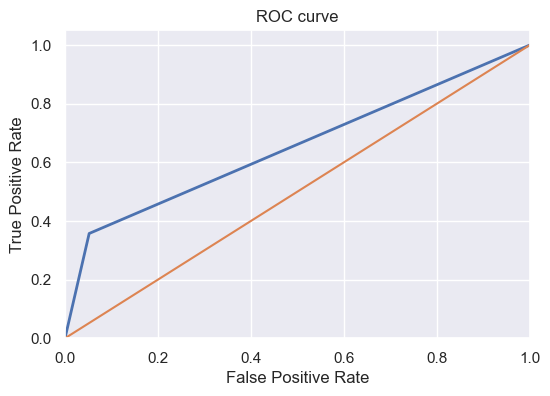

In [138]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Метрики классификации

In [140]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]


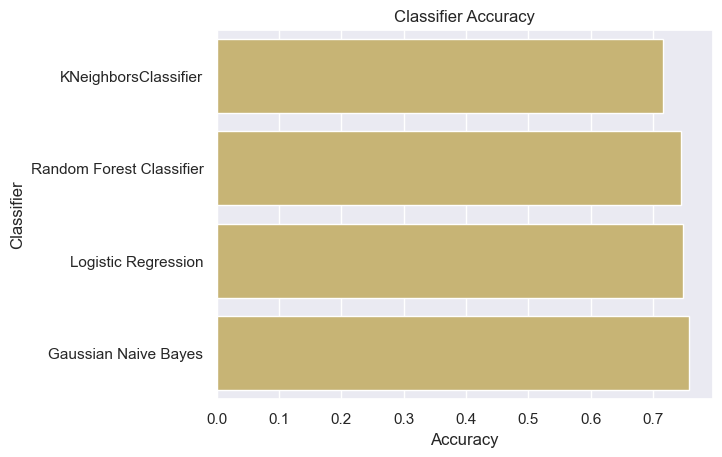

In [141]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="y");

### Вывод

Наилучшую точность показала модель Gaussian Naive Bayes с результатом 0.757576. 

Другие модели, такие как KNeighborsClassifier, Random Forest Classifier и Logistic Regression, также показали хорошие результаты, но немного уступают по точности модели Gaussian Naive Bayes. 